# Recorded data

In [121]:
import pickle
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [195]:
# read data
data = {}
with open('data-test.pkl', 'rb') as f:
    data = pickle.load(f)
    

In [196]:
print(len(data))
print(data[0]["stack"])

58
[array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]]), array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]]), array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])]


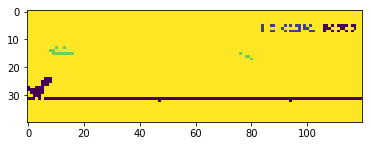

In [197]:
plt.imshow(data[0]["stack"][0])

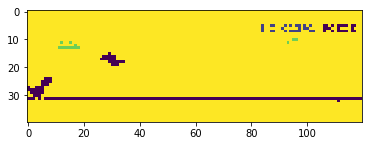

In [198]:
plt.imshow(data[50]["stack"][0])

In [217]:
for d in data[0:20]:
    print(d["value"])
    print(d["stack"][0].shape)

[1, 0]
(40, 120)
[1, 0]
(40, 120)
[1, 0]
(40, 120)
[1, 0]
(40, 120)
[1, 0]
(40, 120)
[1, 0]
(40, 120)
[1, 0]
(40, 120)
[1, 0]
(40, 120)
[1, 0]
(40, 120)
[1, 0]
(40, 120)
[0, 1]
(40, 120)
[1, 0]
(40, 120)
[0, 1]
(40, 120)
[1, 0]
(40, 120)
[0, 1]
(40, 120)
[1, 0]
(40, 120)
[1, 0]
(40, 120)
[0, 1]
(40, 120)
[1, 0]
(40, 120)
[1, 0]
(40, 120)


# Sample model train

In [207]:
model = models.Sequential()
model.add(layers.Conv2D(
    32, (3, 3), activation='relu', input_shape=(40, 120, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 38, 118, 32)       896       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 19, 59, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 17, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 8, 28, 64)         0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 6, 26, 64)         36928     
_________________________________________________________________
flatten_25 (Flatten)         (None, 9984)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 64)                639040    
__________

58
(58, 40, 120, 3)
58
(58, 2)
[1 0]


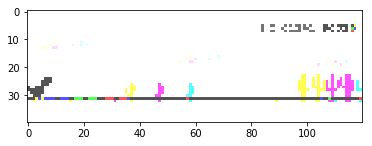

In [208]:
x = []
y = []
for d in data:
    tmp = [d["stack"][0]/255, d["stack"][1]/255, d["stack"][2]/255]
    x.append(np.stack(tmp, axis=2))
    y.append(np.array(d["value"]))
x = np.array(x)
y = np.array(y)

print(len(x))
print(x.shape)
print(len(y))
print(y.shape)

print(y[20])
plt.imshow(x[20])

In [209]:
xx = np.array([x[9], x[0]])
yy = np.array([y[9], y[0]])
print(yy)
history = model.fit(x, y, epochs=20)

[[1 0]
 [1 0]]
Epoch 1/20
58/58 [==============================] - 2s 28ms/step - loss: 0.6641 - acc: 0.4828
Epoch 2/20
58/58 [==============================] - 0s 403us/step - loss: 0.5916 - acc: 0.7241
Epoch 3/20
58/58 [==============================] - 0s 428us/step - loss: 0.5949 - acc: 0.7241
Epoch 4/20
58/58 [==============================] - 0s 380us/step - loss: 0.5917 - acc: 0.7241
Epoch 5/20
58/58 [==============================] - 0s 414us/step - loss: 0.6024 - acc: 0.7241
Epoch 6/20
58/58 [==============================] - 0s 378us/step - loss: 0.5885 - acc: 0.7241
Epoch 7/20
58/58 [==============================] - 0s 372us/step - loss: 0.5863 - acc: 0.7241
Epoch 8/20
58/58 [==============================] - 0s 442us/step - loss: 0.5841 - acc: 0.7241
Epoch 9/20
58/58 [==============================] - 0s 378us/step - loss: 0.5706 - acc: 0.7241
Epoch 10/20
58/58 [==============================] - 0s 390us/step - loss: 0.5701 - acc: 0.7241
Epoch 11/20
58/58 [================

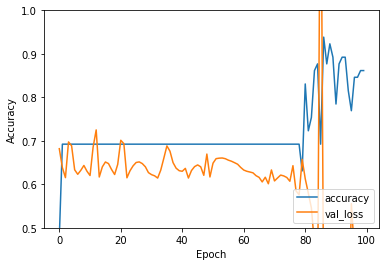

In [185]:

plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [201]:
test_loss, test_acc = model.evaluate(x, y, verbose=2)
print(test_loss)
print(test_acc)


0.936029904875262
0.9137931055036085


In [218]:
print(model.predict(np.array([x[10]])))
print(model.predict_classes(np.array([x[10]])))

[[0.4738525 0.5261475]]
[1]


In [210]:
tf.keras.models.save_model(model, 'model.tf')